In [1]:
#Importing libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm  
import os
import warnings 
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight')

In [2]:
# Configure API key 
quandl.ApiConfig.api_key = '3EEeru8FYo2Na7qdY7Uo'

In [3]:
# Importing the Zillow Real Estate Data
df = quandl.get_table('ZILLOW/DATA', indicator_id='ZSFH', region_id=['99999'])

In [4]:
# Making a new df with required columns
df1 = df[['date', 'value']]

In [5]:
# Setting date as index
df2 = df1.set_index('date')

In [6]:
# Checking
df2.head()

value
date                     
2023-06-30  486904.262594
2023-05-31  485988.875565
2023-04-30  486024.220323
2023-03-31  478245.160686
2023-02-28  447694.734130

In [7]:
df2.shape

(222, 1)

In [8]:
df2.columns

Index(['value'], dtype='object')

In [9]:
type(df2)

pandas.core.frame.DataFrame

In [10]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df2)

Subsetting, wrangling, and cleaning time-series data

In [11]:
# Reset index 
data_2 = df2.reset_index()

In [12]:
#Checking
data_2.head()

date          value
0 2023-06-30  486904.262594
1 2023-05-31  485988.875565
2 2023-04-30  486024.220323
3 2023-03-31  478245.160686
4 2023-02-28  447694.734130

In [13]:
# Set the "Date" column as the index
from datetime import datetime

data_2['datetime'] = pd.to_datetime(data_2['date']) # Create a datetime column from "Date.""
data_2 = data_2.set_index('datetime') # Set the datetime as the index of the dataframe.
data_2.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
data_2.head()

value
datetime                 
2023-06-30  486904.262594
2023-05-31  485988.875565
2023-04-30  486024.220323
2023-03-31  478245.160686
2023-02-28  447694.734130

In [14]:
# Plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_2)

In [15]:
# Check for missing values
data_2.isnull().sum() 

value    0
dtype: int64

In [16]:
# Check for duplicates
dups = data_2.duplicated()
dups.sum()

1

In [17]:
# Removing duplicates
df3 = data_2.drop_duplicates(keep=False)

In [18]:
# Check for duplicates
dups = df3.duplicated()
dups.sum()

0

Time-series analysis: decomposition

In [19]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data_2, model='additive')

In [20]:
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

In [21]:
# Plot the separate components
decomposition.plot()
plt.show()

Testing for stationarity

In [33]:
from statsmodels.tsa.stattools import adfuller 
from statsmodels.graphics.tsaplots import plot_acf
def dickey_fuller(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_2['value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -5.468338
p-value                          0.000002
Number of Lags Used             15.000000
Number of Observations Used    206.000000
Critical Value (1%)             -3.462499
Critical Value (5%)             -2.875675
Critical Value (10%)            -2.574304
dtype: float64


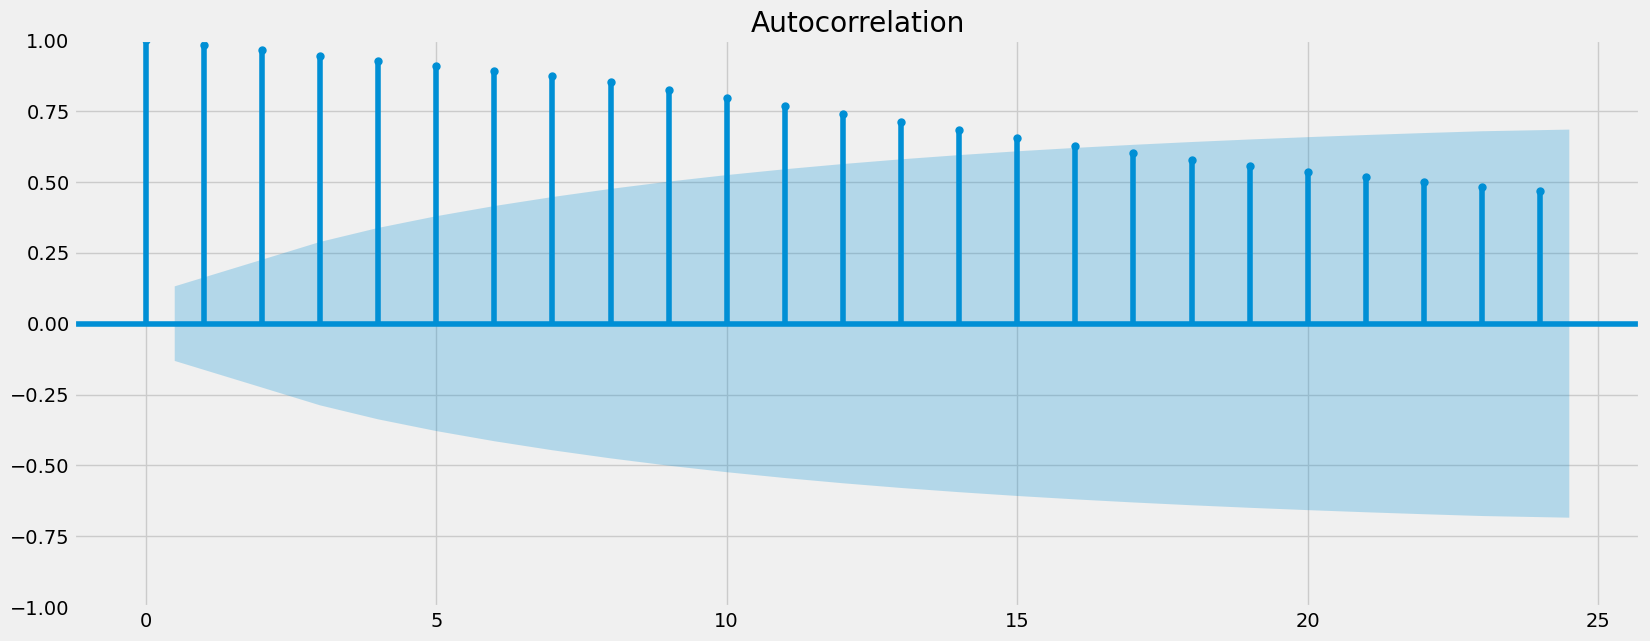

In [34]:
plot_acf(data_2)
plt.show()

Based on the graph, I could observe that there are many lines above the blue area which indicates that the data is non stationary

Stationarizing the Zillow Real Estate Data

In [26]:
data_diff = data_2 - data_2.shift(1) 

In [27]:
data_diff.dropna(inplace = True) 

In [28]:
data_diff.head()

value
datetime                
2023-05-31   -915.387028
2023-04-30     35.344757
2023-03-31  -7779.059636
2023-02-28 -30550.426556
2023-01-31  -5161.761246

In [29]:
data_diff.columns

Index(['value'], dtype='object')

In [30]:
# Checking how differencing affects time series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [31]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -5.192248
p-value                          0.000009
Number of Lags Used             15.000000
Number of Observations Used    205.000000
Critical Value (1%)             -3.462658
Critical Value (5%)             -2.875744
Critical Value (10%)            -2.574341
dtype: float64


In [35]:
plot_acf(data_diff)
plt.show()